<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#朴素贝叶斯方法" data-toc-modified-id="朴素贝叶斯方法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>朴素贝叶斯方法</a></span><ul class="toc-item"><li><span><a href="#模型推导" data-toc-modified-id="模型推导-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>模型推导</a></span></li><li><span><a href="#最大化后验概率的含义" data-toc-modified-id="最大化后验概率的含义-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>最大化后验概率的含义</a></span></li></ul></li><li><span><a href="#GaussianNB-高斯朴素贝叶斯方法" data-toc-modified-id="GaussianNB-高斯朴素贝叶斯方法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GaussianNB 高斯朴素贝叶斯方法</a></span><ul class="toc-item"><li><span><a href="#定义朴素贝叶斯模型" data-toc-modified-id="定义朴素贝叶斯模型-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>定义朴素贝叶斯模型</a></span></li><li><span><a href="#iris部分数据集验证" data-toc-modified-id="iris部分数据集验证-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>iris部分数据集验证</a></span></li><li><span><a href="#计算正确率" data-toc-modified-id="计算正确率-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>计算正确率</a></span></li><li><span><a href="#iris全数据集验证" data-toc-modified-id="iris全数据集验证-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>iris全数据集验证</a></span><ul class="toc-item"><li><span><a href="#手写模型验证" data-toc-modified-id="手写模型验证-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>手写模型验证</a></span></li><li><span><a href="#sklearn-验证对比" data-toc-modified-id="sklearn-验证对比-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>sklearn 验证对比</a></span></li></ul></li></ul></li><li><span><a href="#Bernoulli-Naive-Bayes-伯努利朴素贝叶斯" data-toc-modified-id="Bernoulli-Naive-Bayes-伯努利朴素贝叶斯-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bernoulli Naive Bayes 伯努利朴素贝叶斯</a></span></li><li><span><a href="#Multinomial-Naive-Bayes-多项式朴素贝叶斯" data-toc-modified-id="Multinomial-Naive-Bayes-多项式朴素贝叶斯-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multinomial Naive Bayes 多项式朴素贝叶斯</a></span><ul class="toc-item"><li><span><a href="#模型推导" data-toc-modified-id="模型推导-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>模型推导</a></span></li><li><span><a href="#sklearn-MultinomialNB" data-toc-modified-id="sklearn-MultinomialNB-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>sklearn MultinomialNB</a></span></li></ul></li><li><span><a href="#参考文献" data-toc-modified-id="参考文献-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>参考文献</a></span></li></ul></div>

# 朴素贝叶斯方法
设输入空间$\chi\in R$为n维向量的集合，输出空间为类标记集合$\Upsilon = {c_1, c_2, \ldots  ,c_n}$输入为特征向量$x\in\chi$,输出为类标记(class label) $y\in\Upsilon$. X是定义在输入空间x上的随机向量，Y是定义在输出空间D.上的随机变量. $P(X,Y)$是X和Y的联合概率分布.训练数据集
$$ T = \{(x_1, y_1), (x_2, y_2), \ldots  (x_N, y_N)\}$$
在给定的数据集下我们能够求出X和Y的联合概率分布$P(X,Y)$，具体来说是学习先验概率:

\begin{equation}
P(Y = c_k) (k = 1,2, \ldots ,n)
\label{eq:先验概率}
\end{equation}

条件概率:
\begin{equation}
P(X=x|Y=c_k) = P(X^{(1)}=x^{(1)}, \ldots, X^{(N)}=x^{(N)}|Y=c_k)
\label{eq:条件概率}
\end{equation}

于是我们就能得到联合概率函数
\begin{equation}
P(X,Y) = \sum_{i=0}^NP(X=x|Y=c_k)P(Y=c_k)
\label{eq:联合概率函数}
\end{equation}

在计算条件概率中$P(X=x|Y=c_k)$是一个非常大的指数级参数，在求取过程中非常复杂。于是，求解过程中给定一个条件独立的假设：
> 分类的特征在分类确定的条件下，条件都是独立的，即
\begin{equation}
P(X=x|Y=c_k) = P(X^{(1)}=x^{(1)}, \ldots, X^{(N)}=x^{(N)}|Y=c_k) = \prod_{j=1}^NP(X^j=x^j|Y=c_k)
\label{eq:约束条件}
\end{equation}

## 模型推导
在已知$X=(x^{(1)}, x^{(2)}, \ldots  , x^{(n)})$的情况下，需要求得$P(Y = C_k)$的概率,即：$P(X|Y)$.
根据朴素贝叶斯法,$P(X|Y) = \frac{P(X, Y)}{P(Y)}$, 将\eqref{eq:先验概率}:、\eqref{eq:联合概率函数}、\eqref{eq:约束条件}带入得到：
$$
\begin{equation}
\begin{aligned}
P(Y=C_k|X=x) 
&= \frac{P(X=x|Y=c_k)P(Y=c_k)}{P(Y=c_k)} \\
&= \frac{P(X=x|Y=c_k)P(Y=c_k)}{\sum_{j=1}^{n}P(X^k=x^k)P(Y=c_k)} \\
&=\frac{P(Y=c_k)\prod_{j=1}^{n}P(X^j=x^j|Y=c_k)}{\sum_kP(Y=c_k)\prod_{j=1}^{n}P(X^j=x^j|Y=c_k)}
\label{eq:原始决策模型}
\end{aligned}
\end{equation}
$$
自此\eqref{eq:原始决策模型}所有的值都能通过已知数据获得。于是朴素贝斯分类器\eqref{eq:原始朴素贝斯分类器}可表示为：
$$
\begin{equation}
y = f(x)= {\underset {c_k}{\operatorname {arg\,max} }}\frac{P(Y=c_k)\prod_{j=0}^{n}P(X^j=x^j|Y=c_k)}{\sum_kP(Y=c_k)\prod_{j=1}^{n}P(X^j=x^j|Y=c_k)}
\label{eq:原始朴素贝斯分类器}
\end{equation}
$$
对于所有的分类而言，分类器的分母都是相同的，所以分类器可简化\eqref{eq:简化朴素贝斯分类器}为：
\begin{equation}
y = f(x)= {\underset {c_k}{\operatorname {arg\,max}}}P(Y=c_k)\prod_{j=1}^{n}P(X^j=x^j|Y=c_k)
\label{eq:简化朴素贝斯分类器}
\end{equation}

## 最大化后验概率的含义
朴素贝叶斯方法属于分类问题，我们选择0-1损失函数衡量它的损失：
$$
L(Y,f(x))=\begin{cases}1, Y\neq f(x) \\0, Y = f(x)\end{cases}
$$
其中$f(x)$表示分类决策函数，此时经验风险函数可表示为：
$$
R_{exp}(f) = E[L(Y,f(x))] = E_{X}\sum_{i=1}^{K}[L(c_k, f(x))]P(c_k|X)
$$
最小化经验损失函数就是对每一个x进行最小化，
$$
\begin{aligned}
min \,\, R_{exp}(f) 
&= \underset {c_k}{\operatorname {arg\,\,min}}\sum_{i=1}^{k} L(c_k, y)P(c_k|X) \\ 
&= \underset {c_k}{\operatorname {arg\,\,min}}\sum_{i=1}^{k} P(y\neq c_k|X)\\ 
&= \underset {c_k}{\operatorname {arg\,\,min}}\sum_{i=1}^{k} 1-P(y=c_k|X)\\
&= \underset {c_k}{\operatorname {arg\,\,max}}\sum_{i=1}^{k} P(y=c_k|X)
\end{aligned}
$$
也就是说，最小化经验风险函数，与最大化决策分类函数是一样的，这也就是朴素贝叶斯方法的原理。

# GaussianNB 高斯朴素贝叶斯方法
在上述的决策函数中，$P(X=x|Y=c_k)$是不知道的，于是不同的求取这个条件概率就衍生了不同的算法，我们首先看高斯朴素贝叶斯方法数学模型，及其推导：

对于特征分量 xi 是连续值情形，假设它服从高斯分布。
概率密度函数：
\begin{equation}
P(x_i|y_k) = \frac{1}{\sqrt{2\pi\sigma^2_{i;y_k}})}exp(-\frac{(x_i - \mu_{i;y_k})^2}{2\sigma^2_{i; y_k}})
\label{eq:概率密度函数}
\end{equation}
其中密度函数的两个参数就能够通过频率学派的极大似然方法求得：
+ 均值 $ \mu_{i,y}=\frac{1}{N}\sum{X_(i, y_k)}$
+ 方差 $ \sigma_{i;y_k}^{2} = \frac{1}{N}\sum{(X_{i, y_k}-\mu_{i,y})^2} $

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

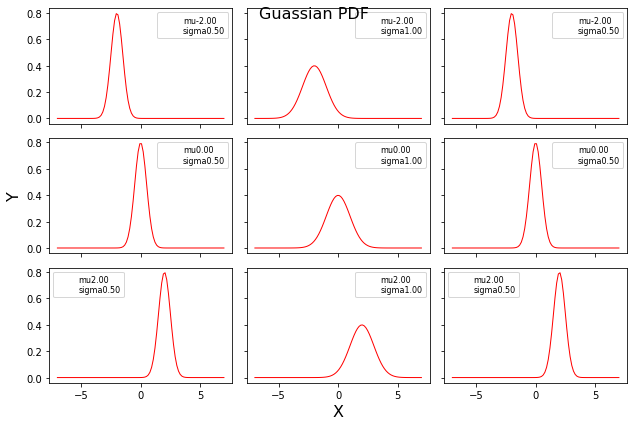

In [2]:
MU = [-2, 0, 2]
STD = [0.5, 1, 0.5]
X = np.linspace(-7, 7, 100)
fig, AX = plt.subplots(len(MU), len(STD), sharex=True, sharey=True, figsize=(9,6))
for row in range(len(MU)):
    for col in range(len(STD)):
        mu = MU[row]
        std = STD[col]
        Y = stats.norm(mu,std).pdf(X)
        AX[row, col].plot(X, Y, 'r', linewidth=1)
        AX[row, col].plot(0, 0, label='mu{:3.2f}\nsigma{:3.2f}'.format(mu, std), alpha=0)
        AX[row, col].legend(fontsize=8, loc='best')
AX[2, 1].set_xlabel('X', fontsize=16)
AX[1, 0].set_ylabel('Y', fontsize=16)
plt.suptitle('Guassian PDF', fontsize=16)
plt.tight_layout()
plt.show()

## 定义朴素贝叶斯模型

In [3]:
from collections import Counter

In [23]:
class GuassianNaiveBayes:
    def __init__(self):
        self.model = None
    
    # 计算高斯分布参数
    def CalculateGaussian(self, data):
        # zip() 压缩， zip(*a) 解压
        return [(np.mean(feature), np.std(feature)) for feature in zip(*data)] 
    
    def fit(self, X, Y):
        # 统计出Y的种类
        labels_counter = Counter(Y)
        self.labels_prob = {label:counter/len(Y) for label, counter in labels_counter.items()}
        # 生成字典类型，分别存放各自的数据
        dataset = {label:[] for label in labels_counter.keys()}
        for x, y in zip(X, Y):
            dataset[y].append(x)
        
        # 根据标签依次存放高斯分布的参数
        self.features_prob = {label:self.CalculateGaussian(data) \
                              for label, data in dataset.items()}
        print('Gaussian Naive Bayse traing done !')
#         print('labels probability', self.labels_prob)
#         print('The parameters of features\' conditional probability:', self.features_prob)
        
    def predict(self, X):
        result = []
        for x in X:
            posterior = {}
            for label in self.labels_prob.keys():
                # 获取先验概率 P(y)
                posterior[label] = self.labels_prob[label]
                for i_feature, mustd in enumerate(self.features_prob[label]):
                    # stats.norm.pdf正态分布概率密度函数
                    # 计算 P(y|x) ~ P(Y)*P(X|Y), 其中正态分布就是求的P(X|Y)
                    posterior[label] *= stats.norm(mustd[0], mustd[1]).pdf(x[i_feature])
            result.append(sorted(posterior.items(), key=lambda x:x[-1])[-1][0])
        return result

## iris部分数据集验证

In [24]:
# 加载数据
iris_npz = np.load('iris.npz')
data = iris_npz['data']
X = iris_npz['X']
Y = iris_npz['Y']

In [25]:
model = GuassianNaiveBayes()
model.fit(X, Y)

Gaussian Naive Bayse traing done !


In [26]:
XTEST = [(5.5, 2.8), (5.5, 3.5), (4.5, 3.5), (6.5, 2.5)]
results = model.predict(XTEST)
print(results)

[1.0, 0.0, 0.0, 1.0]


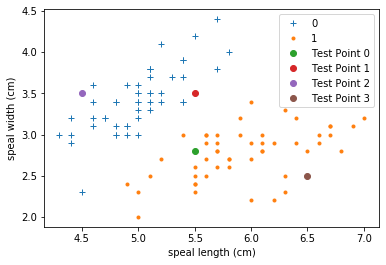

In [27]:
plt.plot(data[:50, 0], data[:50, 1], '+', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], '.', label='1')
for i, point in enumerate(XTEST):
    plt.plot(point[0], point[1], 'o', label='Test Point {0}'.format(i))
plt.xlabel('speal length (cm)')
plt.ylabel('speal width (cm)')
plt.legend()

## 计算正确率

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
# np.random.seed()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
model = GuassianNaiveBayes()
model.fit(X_train, Y_train)
results = model.predict(X_test)
print(type(results) ,type(Y_test) )
scores = (results == Y_test)
print('Accuracy = {:3.2f}'.format(Counter(scores)[True]/len(Y_test)*100))

Gaussian Naive Bayse traing done !
<class 'list'> <class 'numpy.ndarray'>
Accuracy = 96.67


## iris全数据集验证
### 手写模型验证

In [11]:
import pandas as pd
from sklearn.datasets import load_iris

In [12]:
iris_full = load_iris()
iris_df = pd.DataFrame(iris_full.data, columns=iris_full.feature_names)
iris_df['label'] = iris_full.target
data = np.array(iris_df.iloc[:, :])
X_all, Y_all = data[:, :-1], data[:, -1]
print(data.shape, X_all.shape, Y_all.shape)

(150, 5) (150, 4) (150,)


In [13]:
np.random.seed()
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all)
model = GuassianNaiveBayes()
model.fit(X_train, Y_train)
results = model.predict(X_test)
scores = (results == Y_test)
print('Number of mislabeled points out of a total %d points : %d' % (len(Y_test), len(Y_test) - scores.sum()))
print('Accuracy = {:3.2f}%'.format(Counter(scores)[True]/len(Y_test) * 100))

Gaussian Naive Bayse traing done !
labels probability {1.0: 0.32142857142857145, 2.0: 0.35714285714285715, 0.0: 0.32142857142857145}
The parameters of features' conditional probability: {1.0: [(5.880555555555556, 0.4783184924785091), (2.7444444444444454, 0.3148583847845501), (4.227777777777778, 0.47469938505631065), (1.3194444444444446, 0.20251124035256857)], 2.0: [(6.6825, 0.5940906917298067), (3.04, 0.2896549671592048), (5.6049999999999995, 0.5366330217196851), (2.0475000000000003, 0.26550659125528314)], 0.0: [(4.988888888888891, 0.351803115533057), (3.427777777777778, 0.41406595764920184), (1.4722222222222223, 0.1789026909789402), (0.24999999999999994, 0.08975274678557507)]}
Number of mislabeled points out of a total 38 points : 3
Accuracy = 92.11%


### sklearn 验证对比

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
 print('Accuracy = {:3.2f}%'.format(clf.score(X_test, Y_test) * 100))

Accuracy = 92.11%


# Bernoulli Naive Bayes 伯努利朴素贝叶斯
\*注意，该方法处理特征 xi 的分布服从伯努利分布的情形。


In [17]:
import numpy as np 
from sklearn.naive_bayes import BernoulliNB

In [18]:
X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 2, 3, 4, 5, 6])
clf = BernoulliNB()
clf.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
X_train = np.random.randint(2, size=(4, 100))
print(clf.predict(X_train))

[5 3 4 3]


# Multinomial Naive Bayes 多项式朴素贝叶斯

## 模型推导
假设$x$是一个离散的变量，取值可能是$1, 2, 3 ... k$。那么关于$x$的概率分布的集合可以使用一个参数为向量$P$的分布表示，其中$P(X=k)=P_{K}$.另一种写法如下:
$$
\begin{equation}
p(x|P) = \prod p_{k}^{\sigma(x=k)}
\label{eq:条件概率}
\end{equation}
$$
这里的$\sigma(x=k)$是一个指示函数，当$x=k$时，它的结果为$1$，否则为$0$。那么$N$个独立同分布的样本$X=\{x_1, x_2, ... ,x_n\}$的联合概率分布就是:
$$
\begin{aligned}
p(X|p)&=\prod p_{k}^{c_k} \\ 
c_k &= \sum\sigma(x_i=k)
\end{aligned}
$$
其实$c_k$的意思就是观测值是k的变量的个数。构造分类器：
$$
\begin{equation}
\begin{aligned}
f(x)= {\underset {p}{\operatorname {arg\,max}}}p(X|p)&=\prod p_{x}^{c_k} \\ 
s.t. \sum_{k=1}^{K} p_x &= 1
\label{eq:优化模型}
\end{aligned}
\end{equation}
$$


接下来，我们使用拉格朗日乘数法，求得其解析解， 构造拉格朗日函数：
$$
f(p, \lambda)=\sum {c_k}log\,p_{x} + \lambda\left( \sum  p_x - 1 \right)
$$

对$p_k$与$\lambda$分别求偏导得：
$$
\begin{aligned}
\frac{\partial f(p, \lambda)}{\partial p} &= \sum \frac{c_k}{p_x} - \sum\lambda &= 0\\ 
\frac{\partial f(p, \lambda)}{\partial \lambda} &= \sum p_x - 1 &= 0
\end{aligned}
$$
可以解的：
$$
\begin{equation}
\begin{aligned}
\lambda &= \frac{c_x}{p_x} \\ 
p_x &= \frac{c_x}{\sum c_x}
\label{eq:解析解}
\end{aligned}
\end{equation}
$$

将\eqref{eq:解析解}带入到\eqref{eq:条件概率}就能求得条件概率，于是模型求得方法与高斯朴素贝叶斯方法一样进行。
但是在\eqref{eq:解析解}中，我们能够看出，如果存在一个$c_k=0$，则求出的条件概率始终为0，显然这个样子是不符合实际情况的，于是我们加以变形：
$$
\begin{equation}
p_x = \frac{c_x + \alpha}{\sum c_x + n\alpha}
\label{eq:变形解析解}
\end{equation}
$$
上式中，$ \alpha \geq 0$，当 $\alpha = 0 $时，它等价于最大似然估计。 $\alpha > 0$ 可以防止待估计的概率值出现0 的情况，避免对后续计算产生影响。当$ \alpha = 1 $时，该平滑公式被称为拉普拉斯平滑（Laplace Smoothing），当$ \alpha < 1$ 时，被称为 Lidstone 平滑。

## sklearn MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
X = np.random.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 5, 6])
clf = MultinomialNB()
clf.fit(X, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
X_test = np.random.randint(5, size=(2, 100))
print(clf.predict(X_test))

[2 3]


# 参考文献
https://www.datalearner.com/blog/1051512136100311